## 1.Import the Libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## 2.Load Data and Feature Enigineering

In [3]:
df = pd.read_csv('wind_power.csv')
df['Date/Time'] = pd.to_datetime(df['Date/Time'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date/Time'])
df['hour'], df['day'], df['month'] = df['Date/Time'].dt.hour, df['Date/Time'].dt.day, df['Date/Time'].dt.month

X = df[['Wind Speed (m/s)', 'Theoretical_Power_Curve (KWh)', 'Wind Direction (°)', 'hour', 'day', 'month']]
y = df['LV ActivePower (kW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=6, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=15, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, max_depth=5, random_state=42)
}

## 3.Train Model

Linear Regression: 90.26%
XGBoost: 98.24%
Random Forest: 97.26%
Gradient Boosting: 97.26%


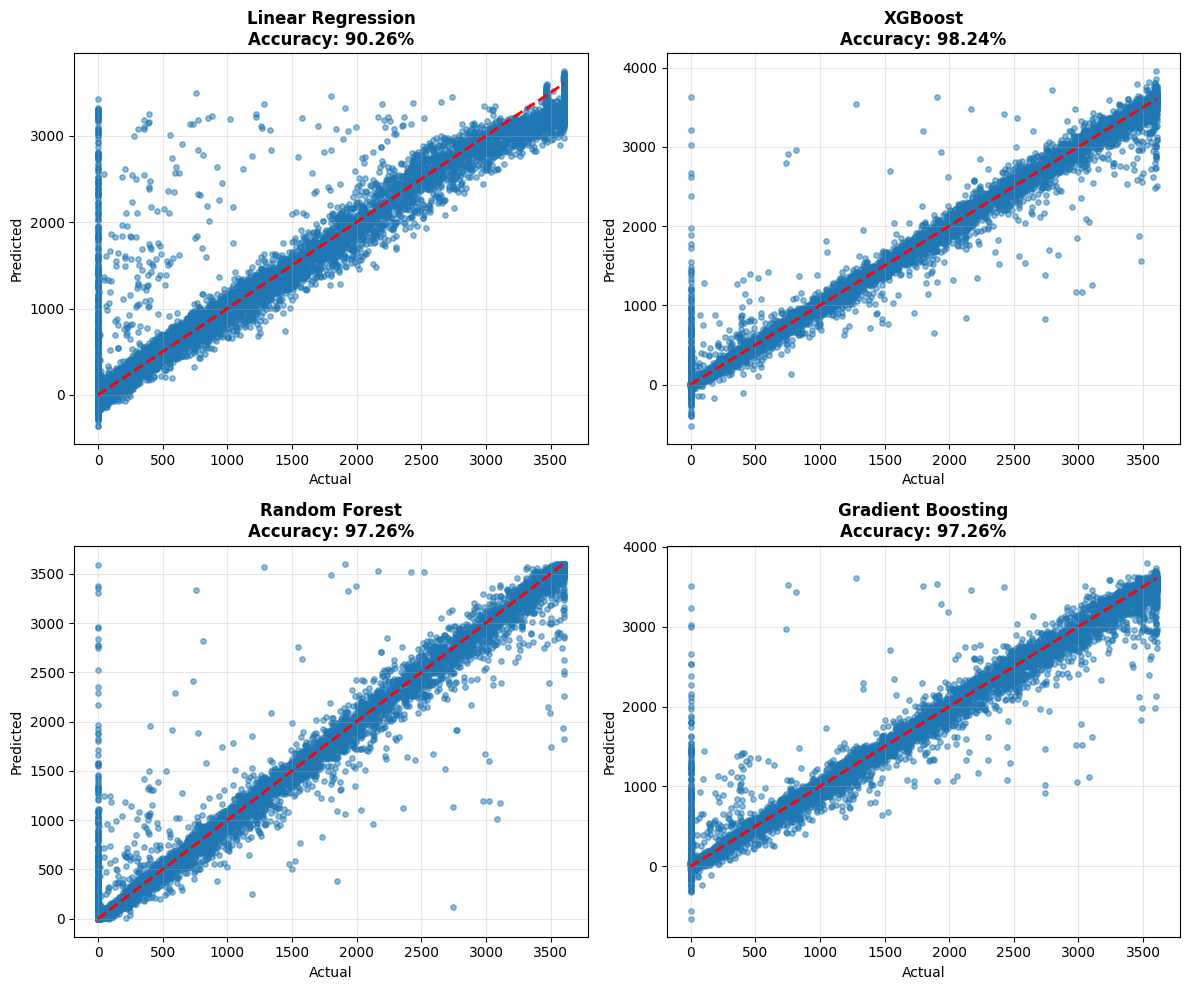

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()
accuracies = []

for i, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = r2_score(y_test, pred) * 100
    accuracies.append(acc)
    
    print(f'{name}: {acc:.2f}%')
    
    axes[i].scatter(y_test, pred, alpha=0.5, s=15)
    axes[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[i].set_title(f'{name}\nAccuracy: {acc:.2f}%', fontweight='bold')
    axes[i].set_xlabel('Actual')
    axes[i].set_ylabel('Predicted')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# Bar graph for accuracy comparison


## 4.Visualization

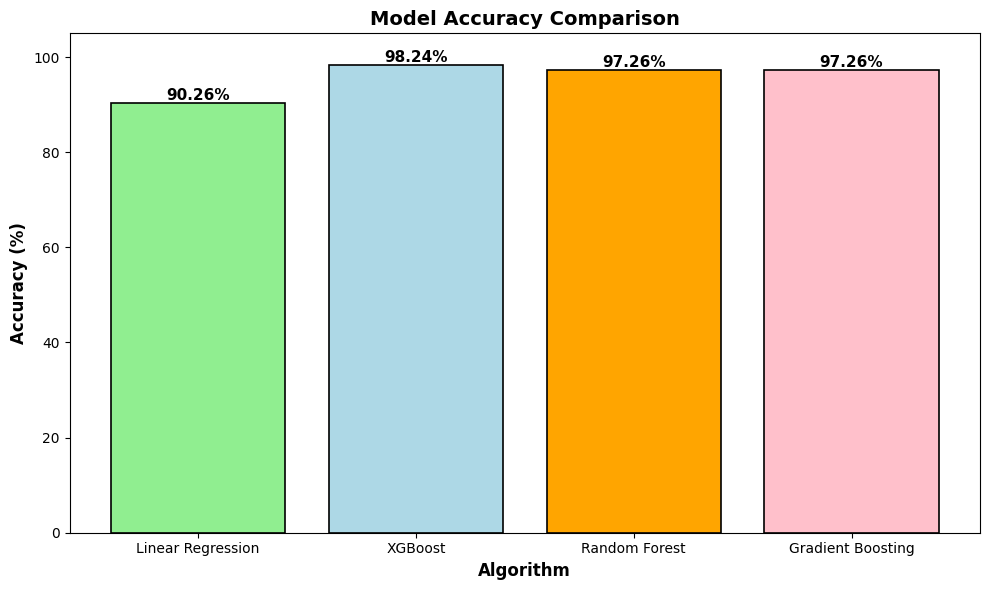

In [12]:
plt.figure(figsize=(10, 6))
algo_names = list(models.keys())
colors = ['lightgreen', 'lightblue', 'orange', 'pink']

bars = plt.bar(algo_names, accuracies, color=colors, edgecolor='black', linewidth=1.2)

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{accuracies[i]:.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.xlabel('Algorithm', fontsize=12, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
plt.title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
plt.ylim(0, 105)
plt.tight_layout()
plt.show()
